In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from os import *
import librosa
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten 
import tensorflow.keras.backend as K
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils import to_categorical



from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Каталог с данными для обучения
train_dir = '/content/gdrive/My Drive/train'
# Каталог с данными для проверки
val_dir = '/content/gdrive/My Drive/val'
# Каталог с данными для тестирования
test_dir = '/content/gdrive/My Drive/test'
# Размеры изображения
img_width, img_height = 432, 288
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)

In [ ]:
# Количество эпох
epochs = 10
# Размер мини-выборки
batch_size = 128
# Количество изображений для обучения
nb_train_samples = 7994
# Количество изображений для проверки
nb_validation_samples = 3998
# Количество изображений для тестирования
nb_test_samples = 2000

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False)

Found 8422 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False)

Found 4200 images belonging to 2 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding= 'same', input_shape= input_shape ),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), padding= 'same', activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), padding = 'same', activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(2, activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 432, 288, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 216, 144, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 144, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 72, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 72, 128)      73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 36, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 248832)            0

In [ ]:
classes = train_generator.class_indices    
print(classes)

{'eng': 0, 'ru': 1}


In [ ]:
history = model.fit_generator( 
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
62/62 [==============================] - 2645s 43s/step - loss: 4.0591 - accuracy: 0.4906 - val_loss: 0.7617 - val_accuracy: 0.4708
Epoch 2/10
62/62 [==============================] - 2097s 34s/step - loss: 0.7416 - accuracy: 0.4938 - val_loss: 0.6926 - val_accuracy: 0.4708
Epoch 3/10
62/62 [==============================] - 2092s 34s/step - loss: 0.6873 - accuracy: 0.5557 - val_loss: 0.6749 - val_accuracy: 0.6106
Epoch 4/10
62/62 [==============================] - 2095s 34s/step - loss: 0.6252 - accuracy: 0.6796 - val_loss: 0.8607 - val_accuracy: 0.4708
Epoch 5/10
62/62 [==============================] - 2088s 34s/step - loss: 0.6840 - accuracy: 0.6101 - val_loss: 0.6296 - val_accuracy: 0.7009
Epoch 6/10
62/62 [==============================] - 2106s 34s/step - loss: 0.5664 - accuracy: 0.7585 - val_loss: 0.6785 - val_accuracy: 0.5980
Epoch 7/10
62/62 [==============================] - 2085s 34s/step

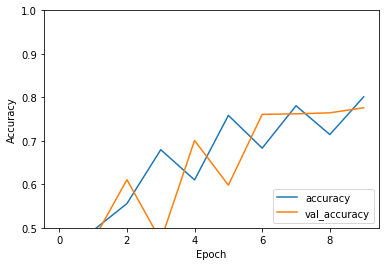

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
model.save('/content/gdrive/My Drive/CNN_fixed')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/CNN_fixed/assets


In [ ]:
model = load_model('/content/gdrive/My Drive/CNN_fixed')

In [ ]:
history2 = model.fit_generator( 
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
62/62 [==============================] - 7184s 116s/step - loss: 0.4358 - accuracy: 0.8000 - val_loss: 0.4489 - val_accuracy: 0.7795
Epoch 2/10
62/62 [==============================] - 2306s 37s/step - loss: 0.3918 - accuracy: 0.8231 - val_loss: 0.4104 - val_accuracy: 0.8039
Epoch 3/10
62/62 [==============================] - 2145s 35s/step - loss: 0.3965 - accuracy: 0.8197 - val_loss: 0.3893 - val_accuracy: 0.8203
Epoch 4/10
62/62 [==============================] - 2152s 35s/step - loss: 0.3692 - accuracy: 0.8310 - val_loss: 0.4435 - val_accuracy: 0.7681
Epoch 5/10
62/62 [==============================] - 2140s 35s/step - loss: 0.3784 - accuracy: 0.8298 - val_loss: 0.3867 - val_accuracy: 0.8196
Epoch 6/10
62/62 [==============================] - 2167s 35s/step - loss: 0.3398 - accuracy: 0.8516 - val_loss: 0.3848 - val_accuracy: 0.8251
Epoch 7/10
62/62 [==============================] - 2150s 35s/step - loss: 0.3270 - accuracy: 0.8485 - val_loss: 0.3612 - val_accuracy: 0.839

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

NameError: ignored

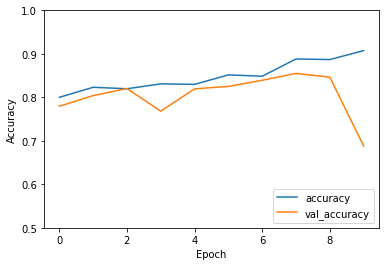

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model.save('/content/gdrive/My Drive/CNN_fixed_20ep')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/CNN_fixed_20ep/assets


In [ ]:
model = load_model('/content/gdrive/My Drive/CNN_fixed_20ep')

In [ ]:
history3 = model.fit_generator( 
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
62/62 [==============================] - 3835s 62s/step - loss: 0.2676 - accuracy: 0.8895 - val_loss: 0.3291 - val_accuracy: 0.8619
Epoch 2/10
62/62 [==============================] - 2201s 35s/step - loss: 0.1927 - accuracy: 0.9240 - val_loss: 0.3197 - val_accuracy: 0.8621
Epoch 3/10
62/62 [==============================] - 2181s 35s/step - loss: 0.2025 - accuracy: 0.9137 - val_loss: 0.3138 - val_accuracy: 0.8657
Epoch 4/10
62/62 [==============================] - 2209s 36s/step - loss: 0.2056 - accuracy: 0.9135 - val_loss: 0.4274 - val_accuracy: 0.8480
Epoch 5/10
62/62 [==============================] - 2216s 36s/step - loss: 0.5027 - accuracy: 0.7598 - val_loss: 0.5111 - val_accuracy: 0.7497
Epoch 6/10
62/62 [==============================] - 2193s 35s/step - loss: 0.3265 - accuracy: 0.8537 - val_loss: 0.3467 - val_accuracy: 0.8601
Epoch 7/10
62/62 [==============================] - 2209s 36s/step - loss: 0.1828 - accuracy: 0.9271 - val_loss: 0.3479 - val_accuracy: 0.8627

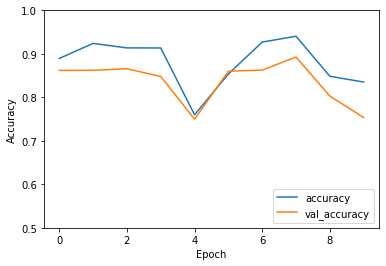

In [ ]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model.save('/content/gdrive/My Drive/CNN_fixed_30ep')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/CNN_fixed_30ep/assets


In [ ]:
model = load_model('/content/gdrive/My Drive/CNN_fixed_30ep')

In [ ]:
history4 = model.fit_generator( 
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
62/62 [==============================] - 3837s 62s/step - loss: 0.2984 - accuracy: 0.8722 - val_loss: 0.4181 - val_accuracy: 0.8614
Epoch 2/10
62/62 [==============================] - 2141s 35s/step - loss: 0.1604 - accuracy: 0.9336 - val_loss: 0.3965 - val_accuracy: 0.8758
Epoch 3/10
62/62 [==============================] - 2101s 34s/step - loss: 0.1200 - accuracy: 0.9501 - val_loss: 0.4192 - val_accuracy: 0.8790
Epoch 4/10
62/62 [==============================] - 2106s 34s/step - loss: 0.1047 - accuracy: 0.9564 - val_loss: 0.4101 - val_accuracy: 0.8884
Epoch 5/10
62/62 [==============================] - 2110s 34s/step - loss: 0.1001 - accuracy: 0.9612 - val_loss: 0.3700 - val_accuracy: 0.8919
Epoch 6/10
62/62 [==============================] - 2133s 34s/step - loss: 0.0842 - accuracy: 0.9647 - val_loss: 0.4005 - val_accuracy: 0.8901
Epoch 7/10
62/62 [==============================] - 2116s 34s/step

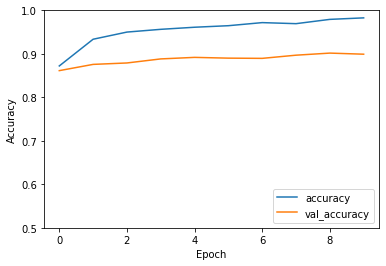

In [ ]:
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model.save('/content/gdrive/My Drive/CNN_fixed_40ep')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/CNN_fixed_40ep/assets


In [ ]:
scores = model.evaluate(test_generator, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 38.25%


In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(432, 288), color_mode= 'rgb')
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__": 

    # image path
    img_path = '/content/gdrive/My Drive/train/2/2092-145709-0014.jpg'
 
  
    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

NameError: ignored

In [ ]:
pred

array([[1.6914922e-07, 9.9999988e-01]], dtype=float32)